# AB Testing for Website Marketing Campaign
Data pulled from Kaggle: https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset/data

## Overview
The goal of this experiment is to check if a change in the marketing strategy of a website improved the website's performance in terms of reaching the audience and converting them to valuable users. I will first proceed with experiment design, where I define the invariant metrics and evaluation metrics for this study, measure the respective standard deviations. Then I will move on to experiment analysis, where I will do sanity checks on my invariant metrics as well as the results of the experiment. Then I will provide a recommendation on whether or not to launch the change on the website. 

### Setup

In [264]:
# import libraries for ab testing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# load control_group data and test_group data, data seperated by semi colon
control_group = pd.read_csv("control_group.csv", sep=";")
test_group = pd.read_csv("test_group.csv", sep=";")
control_group.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [265]:
# check the first 5 rows of the control_group data
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
# check the first 5 rows of the test_group data
test_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [267]:
# makes sure the data types are correct
control_group.dtypes

Campaign Name           object
Date                    object
Spend [USD]              int64
# of Impressions       float64
Reach                  float64
# of Website Clicks    float64
# of Searches          float64
# of View Content      float64
# of Add to Cart       float64
# of Purchase          float64
dtype: object

In [268]:
test_group.dtypes

Campaign Name          object
Date                   object
Spend [USD]             int64
# of Impressions        int64
Reach                   int64
# of Website Clicks     int64
# of Searches           int64
# of View Content       int64
# of Add to Cart        int64
# of Purchase           int64
dtype: object

In [269]:
# change the data type of the columns in the test_group from int to float for consistency
test_group["# of Purchase"] = test_group["# of Purchase"].astype(float)
test_group["# of Add to Cart"] = test_group["# of Add to Cart"].astype(float)
test_group["# of View Content"] = test_group["# of View Content"].astype(float)
test_group["# of Searches"] = test_group["# of Searches"].astype(float)
test_group["# of Website Clicks"] = test_group["# of Website Clicks"].astype(float)
test_group["Reach"] = test_group["Reach"].astype(float)
test_group["# of Impressions"] = test_group["# of Impressions"].astype(float)

# check the data types of the columns in the test_group
test_group.dtypes

Campaign Name           object
Date                    object
Spend [USD]              int64
# of Impressions       float64
Reach                  float64
# of Website Clicks    float64
# of Searches          float64
# of View Content      float64
# of Add to Cart       float64
# of Purchase          float64
dtype: object

In [270]:
# impute missing value in row 3 of the control_group data
control_group.iloc[:, 3:] = control_group.iloc[:, 3:].fillna(
    control_group.iloc[:, 3:].median()
)


In [271]:
# Change Date column to datetime, specifying dayfirst=True
control_group["Date"] = pd.to_datetime(control_group["Date"], dayfirst=True)
test_group["Date"] = pd.to_datetime(test_group["Date"], dayfirst=True)

# Check if the dates have been parsed correctly
print(control_group["Date"].head())
print(test_group["Date"].head())


0   2019-08-01
1   2019-08-02
2   2019-08-03
3   2019-08-04
4   2019-08-05
Name: Date, dtype: datetime64[ns]
0   2019-08-01
1   2019-08-02
2   2019-08-03
3   2019-08-04
4   2019-08-05
Name: Date, dtype: datetime64[ns]


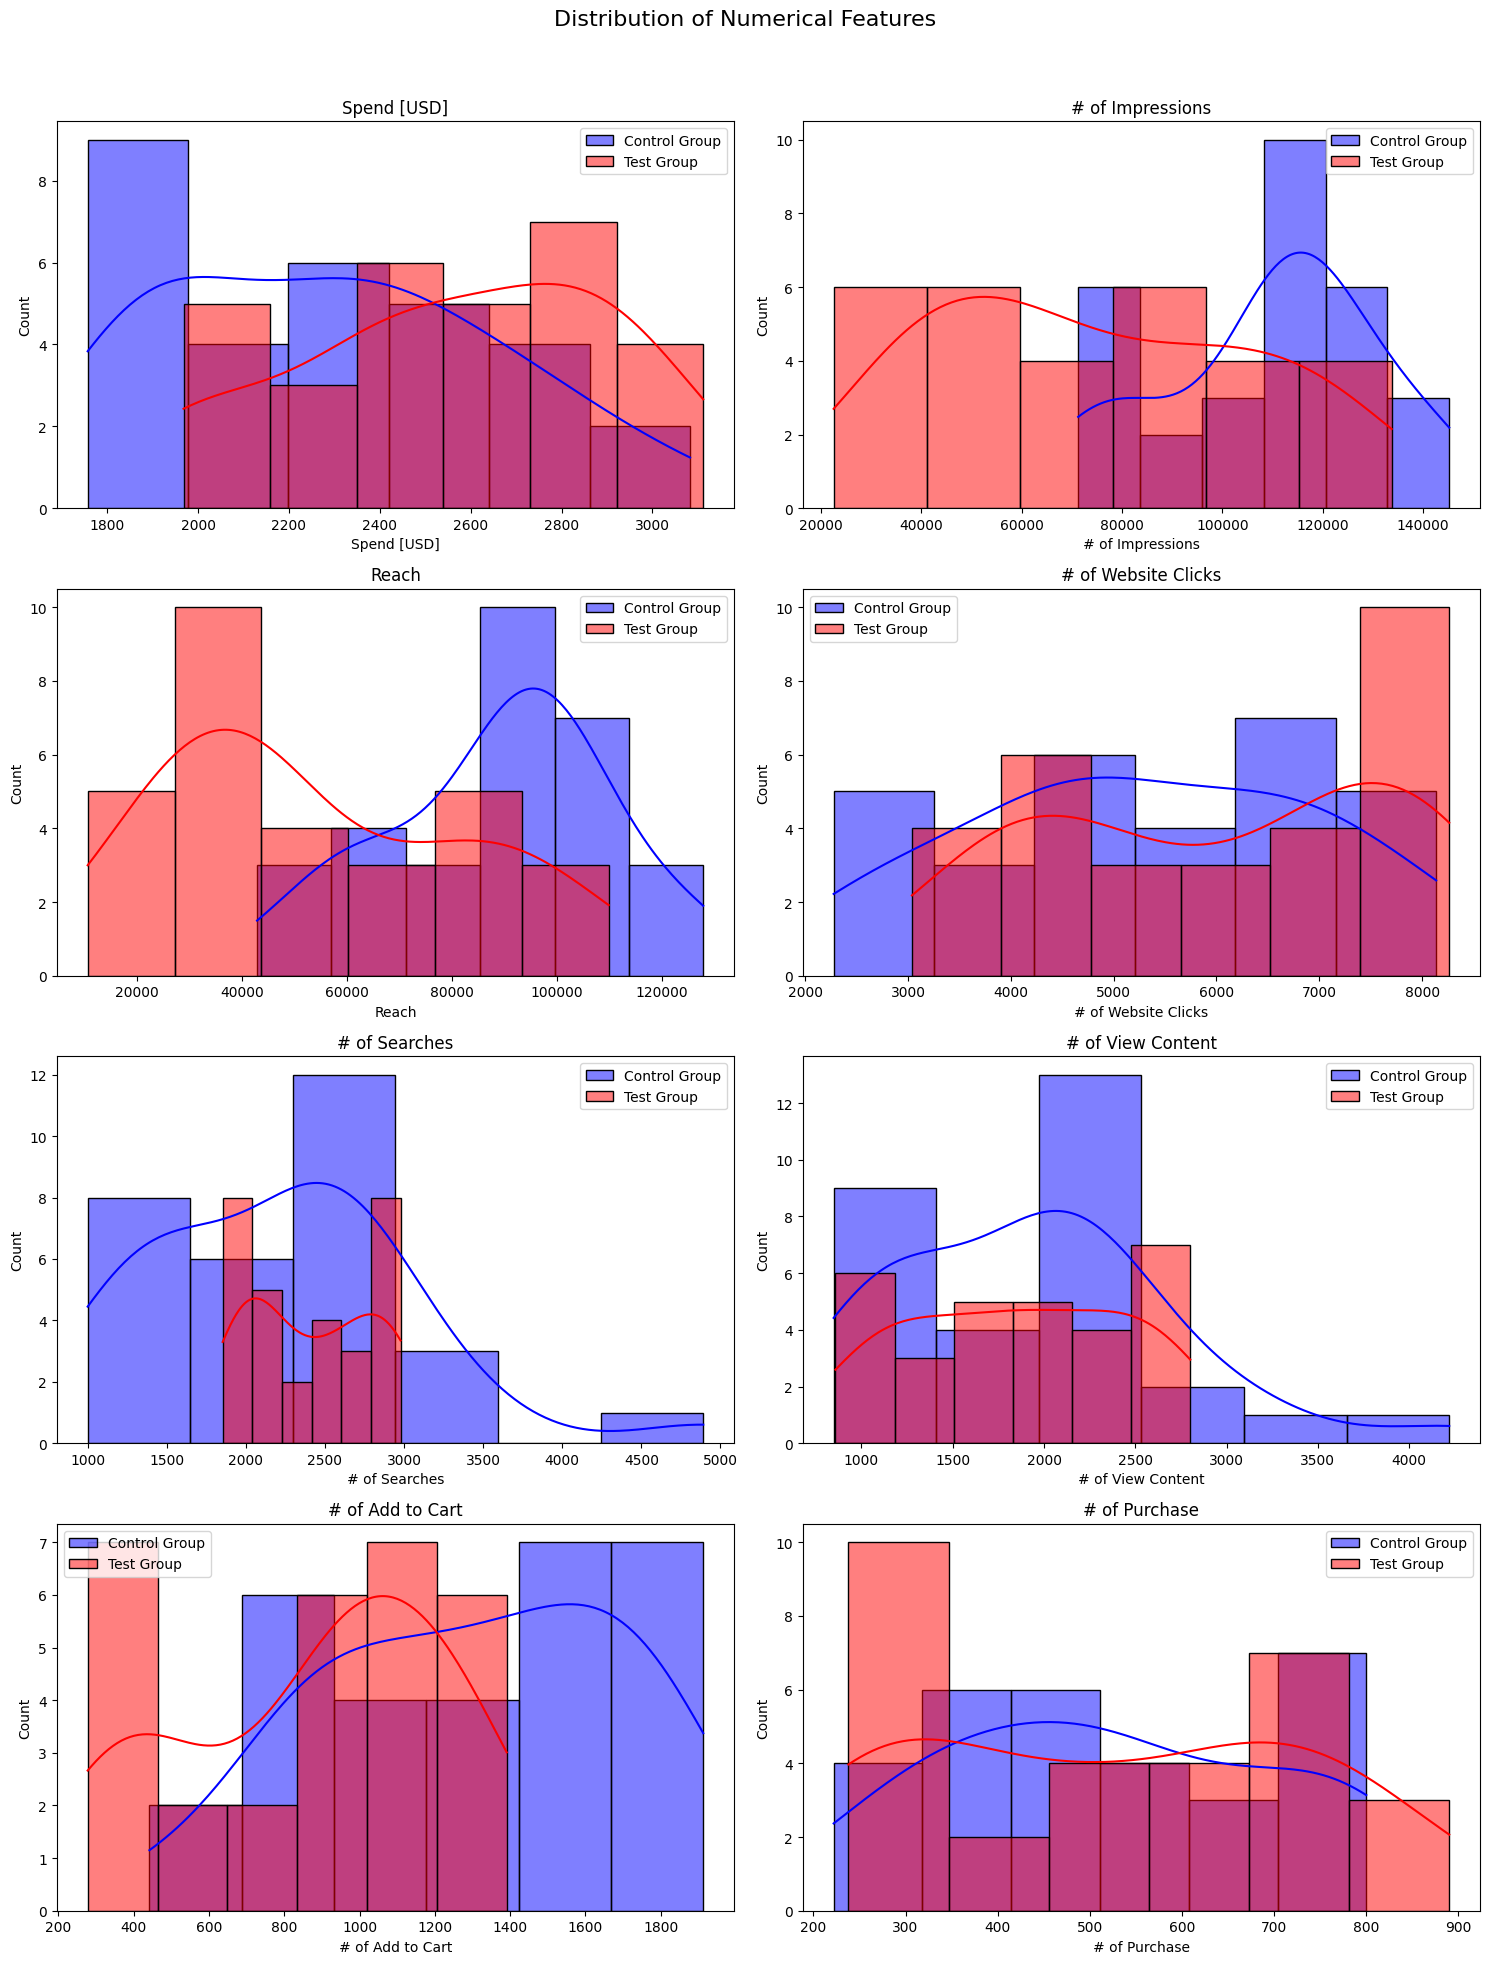

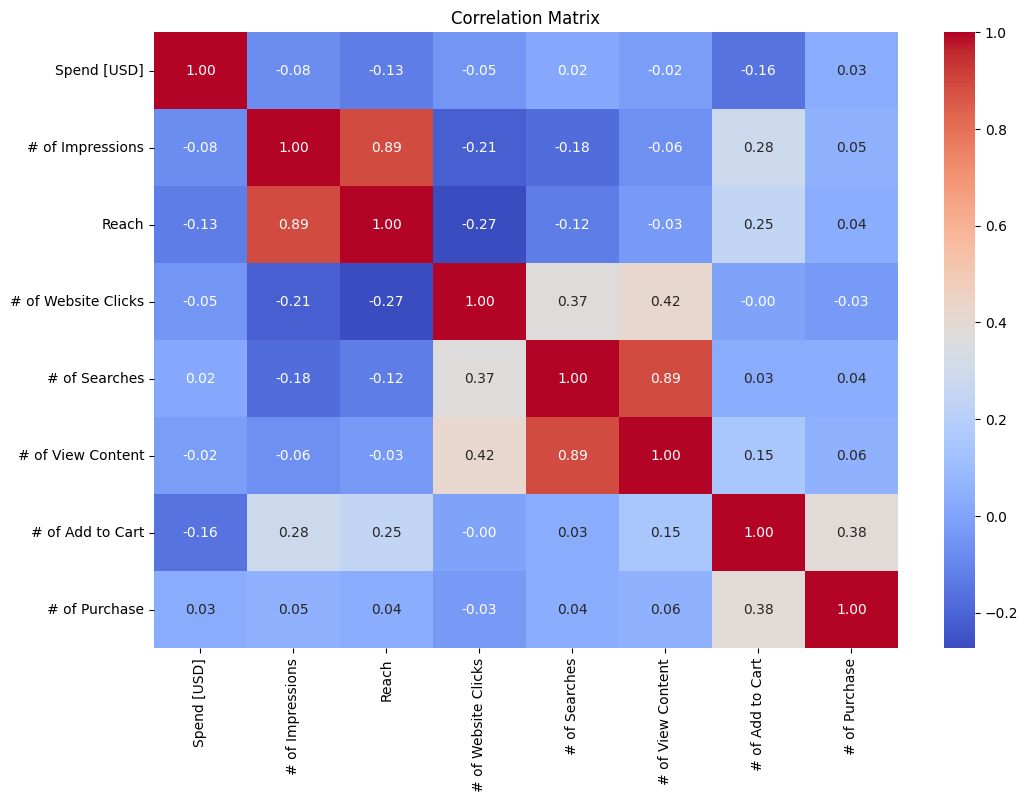

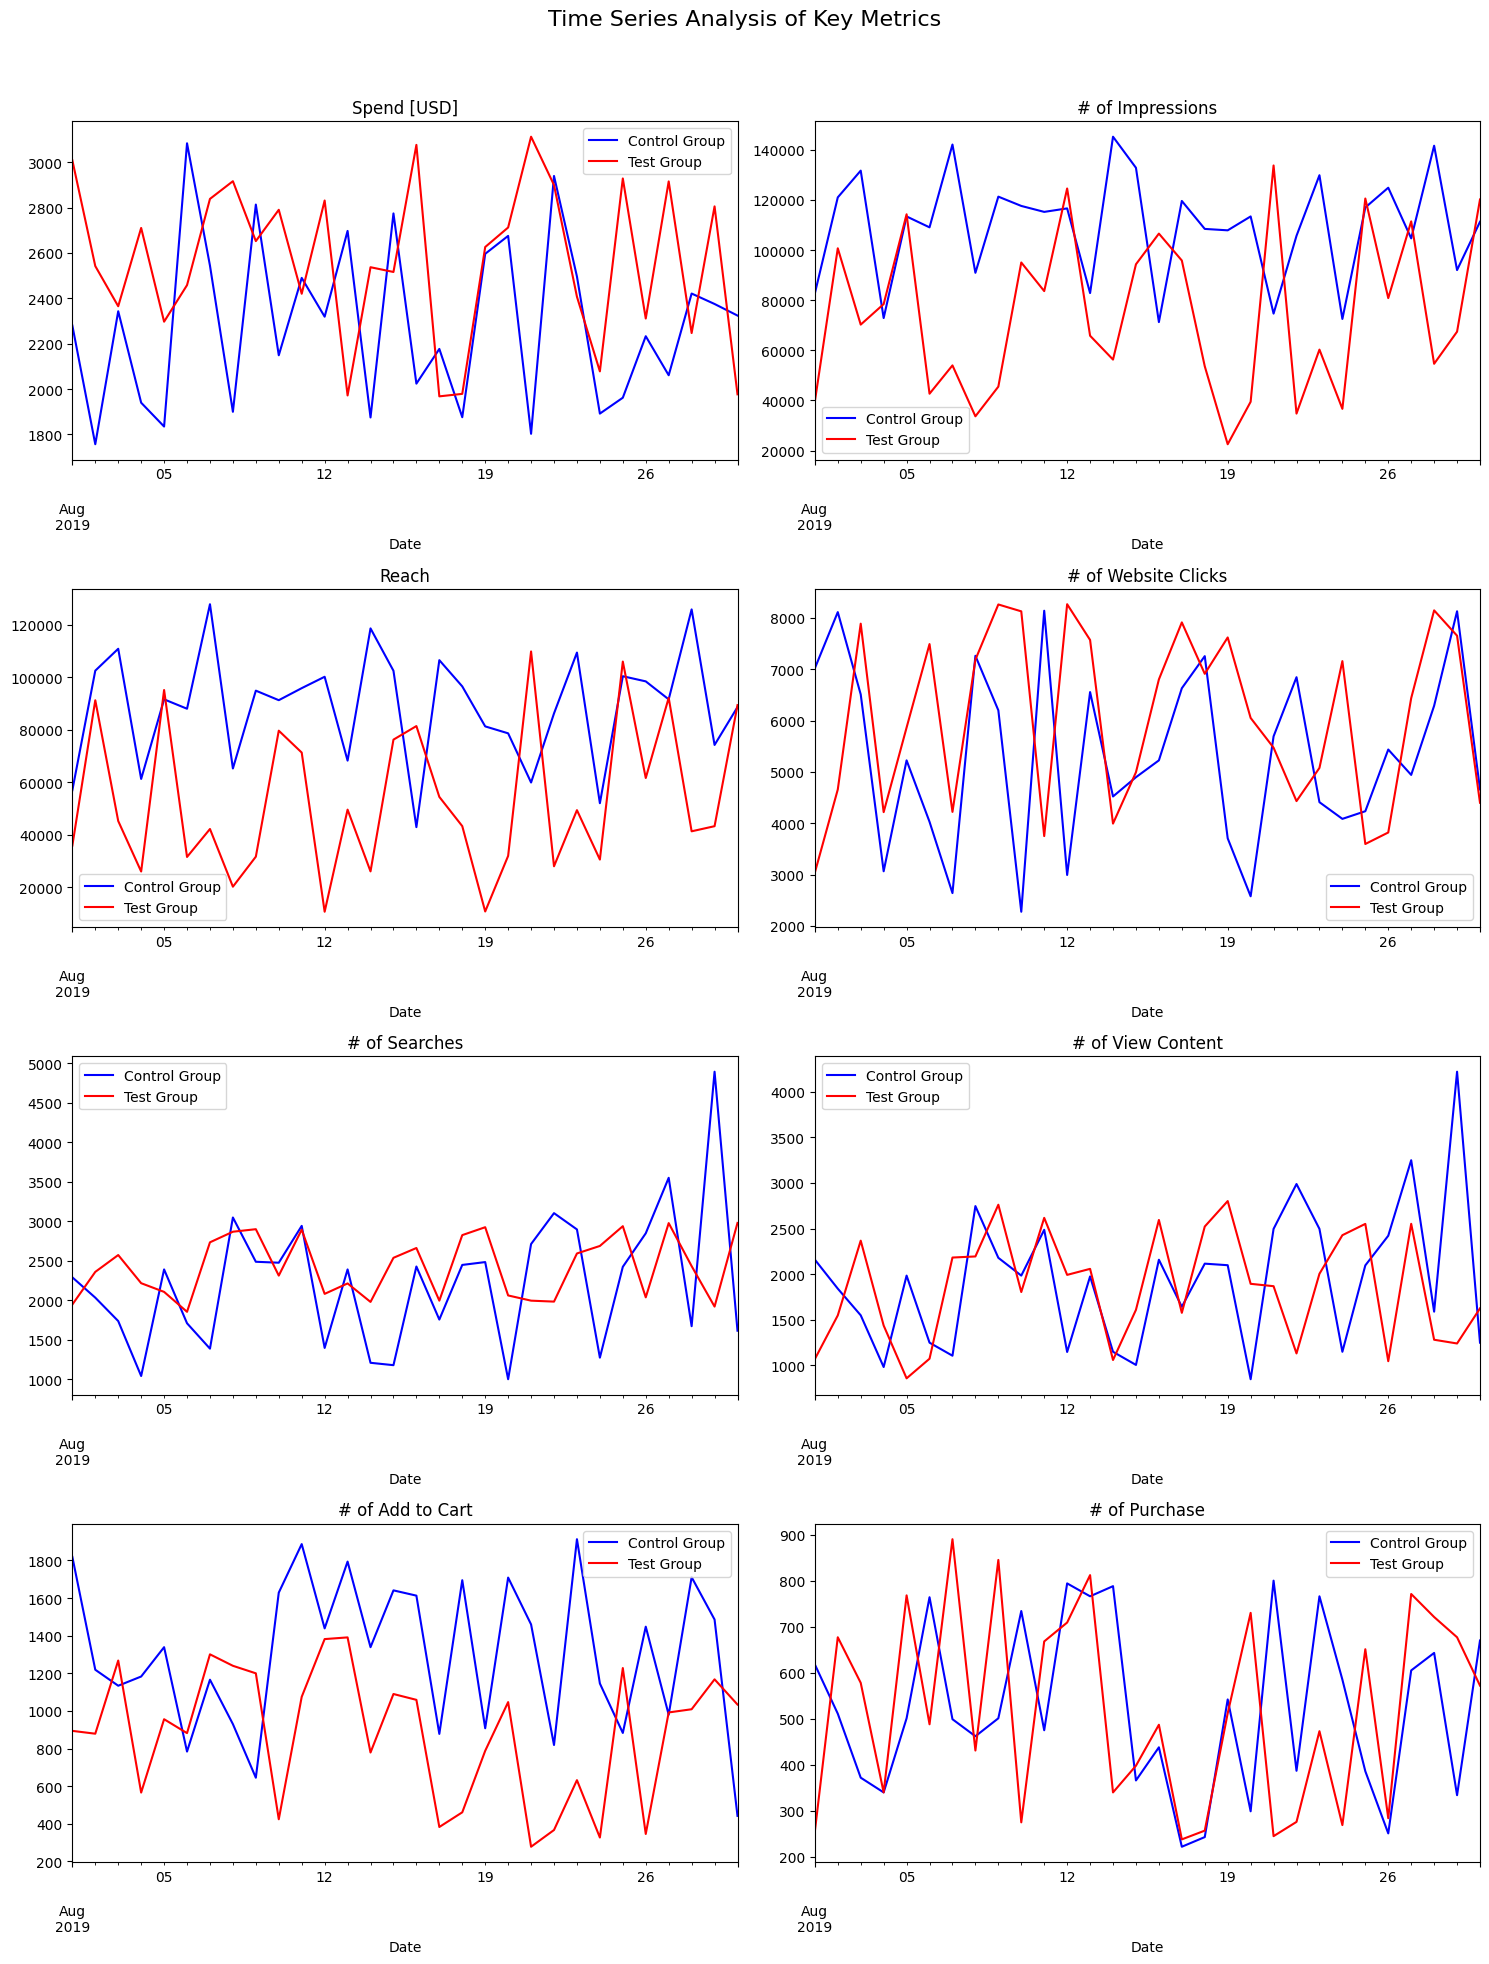

In [272]:
# Distribution of Numerical Features
numerical_features = [
    "Spend [USD]",
    "# of Impressions",
    "Reach",
    "# of Website Clicks",
    "# of Searches",
    "# of View Content",
    "# of Add to Cart",
    "# of Purchase",
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle("Distribution of Numerical Features", fontsize=16)

for i, feature in enumerate(numerical_features):
    sns.histplot(
        control_group[feature],
        kde=True,
        ax=axes[i // 2, i % 2],
        color="blue",
        label="Control Group",
    )
    sns.histplot(
        test_group[feature],
        kde=True,
        ax=axes[i // 2, i % 2],
        color="red",
        label="Test Group",
    )
    axes[i // 2, i % 2].set_title(feature)
    axes[i // 2, i % 2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = pd.concat(
    [control_group[numerical_features], test_group[numerical_features]]
).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Time Series
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle("Time Series Analysis of Key Metrics", fontsize=16)

for i, feature in enumerate(numerical_features):
    control_group.plot(
        x="Date", y=feature, ax=axes[i // 2, i % 2], label="Control Group", color="blue"
    )
    test_group.plot(
        x="Date", y=feature, ax=axes[i // 2, i % 2], label="Test Group", color="red"
    )
    axes[i // 2, i % 2].set_title(feature)
    axes[i // 2, i % 2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Experiment Design

We are comparing two marketing campaigns (Control and Test) to evaluate whether the Test campaign improves website performance. The key metrics to focus on are impressions, clicks, searches, and purchases.

#### Invariant Metrics:
Invariant metrics are those that are not expected to change between control and test groups. For this analysis, I believe the following should not differ by a significant amount between the control and test groups:

**Number of Impressions:** This should be evenly distributed across the two groups since both campaigns were exposed to the same audience.



#### Evaluation Metrics:
The evaluation metrics are those expected to change if the test campaign performs better.

**Number of Website Clicks:** This metric helps evaluate if the test campaign encourages more users to click through to the website.

**Number of Purchases:** This is the key business outcome, as we want to measure if the campaign leads to actual conversions.

**Add to Cart:** Tracks how often users are adding items to the cart.

**View Content:** Measures user engagement with website content.

**Reach:** Number of unique impressions received in the ad should increase if the campaign is successful


In [273]:
# 1. Basic Descriptive Statistics for Key Metrics
metrics = [
    "# of Impressions",
    "# of Website Clicks",
    "# of Add to Cart",
    "# of Purchase",
    "Spend [USD]",
    "# of View Content",
    "Reach",
]

# Control group metrics
control_means = control_group[metrics].mean()
print("Control Group Metrics Means:")
print(control_means)

# Test group metrics
test_means = test_group[metrics].mean()
print("\nTest Group Metrics Means:")
print(test_means)


Control Group Metrics Means:
# of Impressions       109688.766667
# of Website Clicks      5317.566667
# of Add to Cart         1301.300000
# of Purchase             522.066667
Spend [USD]              2288.433333
# of View Content        1945.133333
Reach                   88936.066667
dtype: float64

Test Group Metrics Means:
# of Impressions       74584.800000
# of Website Clicks     6032.333333
# of Add to Cart         881.533333
# of Purchase            521.233333
Spend [USD]             2563.066667
# of View Content       1858.000000
Reach                  53491.566667
dtype: float64


We know our data is logical because the test group spend is greater than the control group spend, which makes sense because a new campaign would mean more money used.

In [274]:
# Define evaluation metrics
evaluation_metrics = [
    "# of Website Clicks",
    "# of Add to Cart",
    "# of Purchase",
    "# of View Content",
    "Reach",
]

# Calculate the standard deviation for each evaluation metric for control group
std_control = control_group[evaluation_metrics].std()

# Calculate the standard deviation for each evaluation metric for test group
std_test = test_group[evaluation_metrics].std()

std_control, std_test

(# of Website Clicks     1726.894156
 # of Add to Cart         400.434518
 # of Purchase            181.854040
 # of View Content        764.057171
 Reach                  21458.434279
 dtype: float64,
 # of Website Clicks     1708.567263
 # of Add to Cart         347.584248
 # of Purchase            211.047745
 # of View Content        597.654669
 Reach                  28795.775752
 dtype: float64)

### Sizing (Number of Samples vs Power)
We want to know if this study has enough samples to give us a statistically significant result. 
In this case, wedon’t need to use Bonferroni correction during this phase because that is used mainly for auto-detection. In our case where we are doing a retroactive study, we can analyze each metric one by one and see if the difference is repeatable. 

In [275]:
# Calculate the baseline conversion rate for # of Website Clicks
clicks_control = control_group[
    "# of Website Clicks"
].sum()  # Total clicks in the control group
impressions_control = control_group[
    "# of Impressions"
].sum()  # Total impressions in the control group

baseline_conversion_rate_clicks = clicks_control / impressions_control
print(
    f"Baseline Conversion Rate for # of Website Clicks: {baseline_conversion_rate_clicks:.4f}"
)

# Calculate the baseline conversion rate for # of Add to Cart
add_to_cart_control = control_group[
    "# of Add to Cart"
].sum()  # Total add to carts in the control group
baseline_conversion_rate_add_to_cart = add_to_cart_control / impressions_control
print(
    f"Baseline Conversion Rate for # of Add to Cart: {baseline_conversion_rate_add_to_cart:.4f}"
)

# Calculate the baseline conversion rate for # of Purchases
purchases_control = control_group[
    "# of Purchase"
].sum()  # Total purchases in the control group
baseline_conversion_rate_purchases = purchases_control / impressions_control
print(
    f"Baseline Conversion Rate for # of Purchases: {baseline_conversion_rate_purchases:.4f}"
)

# Calculate the baseline conversion rate for Reach
reach_control = control_group["Reach"].sum()  # Total reach in the control group
baseline_conversion_rate_reach = reach_control / impressions_control
print(f"Baseline Conversion Rate for Reach: {baseline_conversion_rate_reach:.4f}")

Baseline Conversion Rate for # of Website Clicks: 0.0485
Baseline Conversion Rate for # of Add to Cart: 0.0119
Baseline Conversion Rate for # of Purchases: 0.0048
Baseline Conversion Rate for Reach: 0.8108


In [276]:
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import NormalIndPower

# Define parameters for sample size calculation
alpha = 0.05  # significance level
power = 0.8  # power (1 - beta)
mde = 0.01  # minimum detectable effect (1% change)

# Baseline conversion rates for different metrics (calculated from the control group data)
baseline_conversion_rates = {
    "# of Website Clicks": baseline_conversion_rate_clicks,
    "# of Add to Cart": baseline_conversion_rate_add_to_cart,
    "# of Purchase": baseline_conversion_rate_purchases,
    "Reach": baseline_conversion_rate_reach,
}

# Initialize the power analysis object
power_analysis = NormalIndPower()


# Function to calculate sample size
def calculate_sample_size(baseline_rate, alpha, power, mde):
    effect_size = proportion_effectsize(
        baseline_rate, baseline_rate + mde
    )  # Effect size calculation
    sample_size = power_analysis.solve_power(
        effect_size, power=power, alpha=alpha, ratio=1, alternative="two-sided"
    )
    return sample_size


# Calculate the total sample size needed for each evaluation metric
sample_sizes = {}
for metric, baseline_rate in baseline_conversion_rates.items():
    sample_size = calculate_sample_size(baseline_rate, alpha, power, mde)
    total_sample_size = (
        sample_size * 2
    )  # Multiply by 2 for both control and test groups
    sample_sizes[metric] = int(total_sample_size)

print("Sample sizes needed for each evaluation metric:")
sample_sizes

Sample sizes needed for each evaluation metric:


{'# of Website Clicks': 15858,
 '# of Add to Cart': 5089,
 '# of Purchase': 2821,
 'Reach': 47169}

In [277]:
# Calculate the actual sample size for each metric from the control group data

actual_sample_sizes = {
    "# of Website Clicks": control_group["# of Website Clicks"].sum(),
    "# of Add to Cart": control_group["# of Add to Cart"].sum(),
    "# of Purchase": control_group["# of Purchase"].sum(),
    "Reach": control_group["Reach"].sum(),  # Assuming 'Reach' column exists
}

# make sure the actual sample size is greater than the respective sample size
for metric in sample_sizes.keys():
    if actual_sample_sizes[metric] < sample_sizes[metric]:
        print(
            f"Warning: The actual sample size for {metric} is less than the required sample size."
        )
    else:
        print(f"Actual sample size for {metric} is sufficient.")


Actual sample size for # of Website Clicks is sufficient.
Actual sample size for # of Add to Cart is sufficient.
Actual sample size for # of Purchase is sufficient.
Actual sample size for Reach is sufficient.


### Experiment Analysis

#### Sanity Checks

In [278]:
# 2. Sanity Checks for Invariant Metrics - Impressions
control_impressions = control_group["# of Impressions"].sum()
test_impressions = test_group["# of Impressions"].sum()

# Expected 50% distribution
n_control = len(control_group)
n_test = len(test_group)
expected_proportion = 0.5
observed_proportion = control_impressions / (control_impressions + test_impressions)

# Calculate z-score and p-value for sanity check
std_error = np.sqrt(
    (expected_proportion * (1 - expected_proportion)) / (n_control + n_test)
)
z_score = (observed_proportion - expected_proportion) / std_error
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))

print(f"Sanity check for Impressions - Z-score: {z_score}, P-value: {p_value}")

Sanity check for Impressions - Z-score: 1.4756004428107012, P-value: 0.1400511861977185


The impressions metric has a high p-value of approximately 0.14. This is a positive outcome since impressions are our invariant metric, meaning they are not expected to change significantly between the control and test groups. A high p-value indicates that there is no statistically significant difference in the number of impressions between the two groups, confirming that the randomization process the dataset used was successful and that the two groups are comparable in terms of this metric.



#### Effect Size and Confidence Intervals for Evaluation Metrics

In [279]:
# Function to calculate effect size and confidence intervals for count data
def effect_size_and_ci_counts(control, test, metric):
    control_mean = control[metric].mean()
    test_mean = test[metric].mean()

    # Pooled standard error for two independent groups
    pooled_std = np.sqrt(
        (control[metric].var() / len(control)) + (test[metric].var() / len(test))
    )

    margin_error = 1.96 * pooled_std  # 95% Confidence Interval
    difference = test_mean - control_mean
    lower_bound = difference - margin_error
    upper_bound = difference + margin_error

    print(f"95% CI for {metric}: ({lower_bound}, {upper_bound})")
    return difference, lower_bound, upper_bound


# Evaluation metrics
metrics = [
    "# of Website Clicks",
    "# of Add to Cart",
    "# of Purchase",
    "# of View Content",
    "Reach",
]

# Calculate effect size and confidence intervals for each metric
for metric in metrics:
    print(f"\nEffect Size for {metric}:")
    effect_size_and_ci_counts(control_group, test_group, metric)


Effect Size for # of Website Clicks:
95% CI for # of Website Clicks: (-154.53738017099613, 1584.070713504329)

Effect Size for # of Add to Cart:
95% CI for # of Add to Cart: (-609.5133656043076, -230.0199677290256)

Effect Size for # of Purchase:
95% CI for # of Purchase: (-100.52526255838661, 98.85859589171987)

Effect Size for # of View Content:
95% CI for # of View Content: (-434.2571105999545, 259.9904439332876)

Effect Size for Reach:
95% CI for Reach: (-48295.39114002843, -22593.608859971573)


#### Evaluation 
##### # of Website Clicks:
95% CI: (-154.54, 1584.07)

The confidence interval is quite wide and includes both negative and positive values. This indicates uncertainty about whether the test campaign leads to more or fewer website clicks compared to the control. Since the confidence interval spans both negative and positive values, it suggests that the test campaign might not have had a statistically significant impact on website clicks. 

##### # of Add to Cart:
95% CI: (-609.51, -230.02)

This confidence interval is entirely negative, indicating that the test campaign resulted in significantly fewer users adding items to their cart compared to the control, which suggests that the test campaign may have negatively impacted this metric.

##### # of Purchase:
95% CI: (-100.53, 98.86)

This confidence interval spans both negative and positive values, indicating no clear effect of the test campaign on purchases. There is too much variability to make a conclusion. Since the interval includes zero, it suggests no statistically significant difference between the control and test groups for this metric.

##### Reach:
95% CI: (-48295.39114002843, -22593.608859971573)

This confidence interval spans negative values, indicating that the test campaign resulted in significantly fewer users reached, suggesting that the test campaign had a negative impact on this metric.



## Recommendation: Do Not Launch the Campaign 
Based on the data, there is no strong evidence to suggest that the test campaign improved key metrics (such as purchases or website engagement). The negative impact on Add to Cart is a significant concern and could potentially lead to fewer conversions. As we also noted, the new campaign has an increased spend, and is without corresponding improvements in other areas which suggests that this campaign is not cost-effective.


### Suggested Next Steps:

**Refine the Campaign:**
Investigate why the Add to Cart rate dropped and refine the campaign strategy, focusing on improving user experience at this crucial step.

**Run Further Tests:**
Consider running smaller-scale tests with different versions of the campaign to identify specific changes that might drive better performance.

**Optimize for Cost:**
Focus on improving the campaign’s cost-efficiency, ensuring that any future increases in spend lead to proportional improvements in key metrics like purchases.


In conclusion, launching the current version of the campaign is not recommended, as it risks negatively affecting key business metrics and would increase marketing spend without a clear return on investment.